### **Section 1 – Imports & Data Loading**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, chi2_contingency, chisquare, kruskal


### **Section 2 – Data Understanding**

In [ ]:
# Load the dataset
df = pd.read_csv('MPS_Antisocial_Behaviour.csv')

# Check structure
df.head()
df.info()
df.describe()

### **Section 3 – Data Cleaning**

In [ ]:
# Drop columns with too many missing values or not useful for analysis
df.drop(['Ward_Code', 'Close_Type_3'], axis=1, inplace=True)
# Drop rows with no ASB type or no time
df.dropna(subset=['Opening_Type_2', 'Hour', 'Safer_Neighborhood_Team_Borough_Name'], inplace=True)
# Convert Hour from string format to int
# Check if the 'Hour' column is already in integer format
if df['Hour'].dtype == object:  # Only convert if it's still a string
    df['Hour'] = pd.to_datetime(df['Hour'], format='%H:%M').dt.hour
else:
    print("The 'Hour' column is already in integer/datetime format.")
    # Remove duplicates just in case
df.drop_duplicates(inplace=True)


In [ ]:
# Check how many missing values are still in the dataset
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


,0
OP03,2482
Opening_Type_3,21936
CL01,32
Close_Type_1,197
CL02,4680
Close_Type_2,40981
CL03,4717
Resolution_Type_1,203
Resolution_Type_2,38136
Ward,4612


### **Section 4 – Exploratory Data Analysis (EDA)**

**1. Most frequent ASB types**

<ipython-input-7-e42de75766a3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_asb.values, y=top_asb.index, palette='viridis')


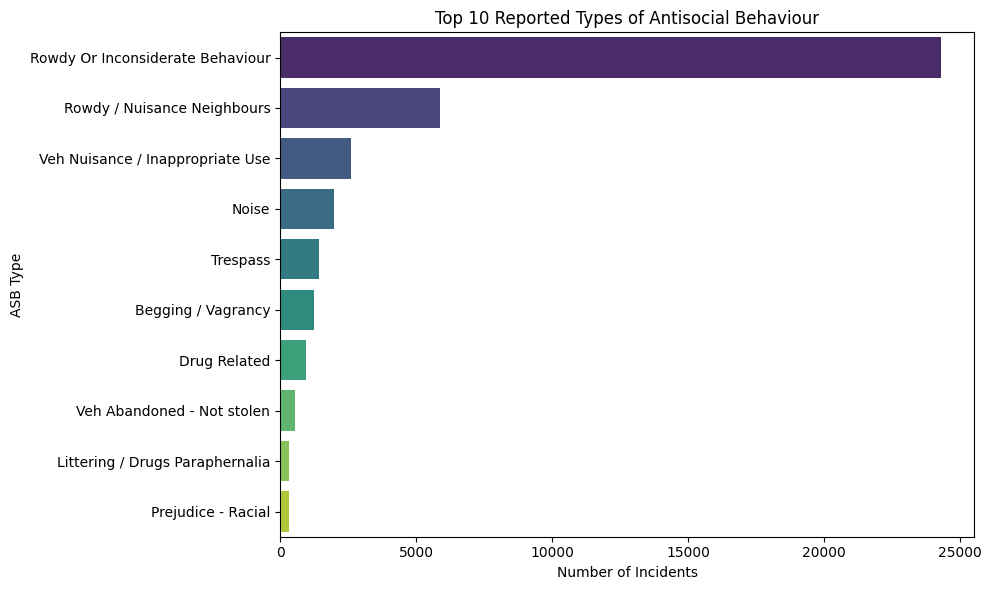

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Top 10 ASB types
top_asb = df['Opening_Type_2'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_asb.values, y=top_asb.index, palette='viridis')
plt.title('Top 10 Reported Types of Antisocial Behaviour')
plt.xlabel('Number of Incidents')
plt.ylabel('ASB Type')
plt.tight_layout()
plt.show()

**2. Incidents by hour**

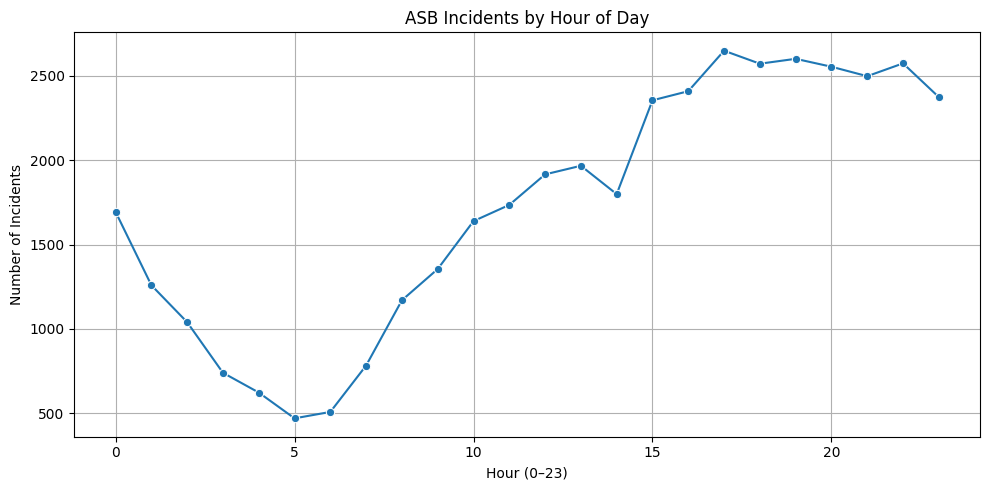

In [ ]:
# Incidents per hour
hourly_asb = df['Hour'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_asb.index, y=hourly_asb.values, marker='o')
plt.title('ASB Incidents by Hour of Day')
plt.xlabel('Hour (0–23)')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.tight_layout()
plt.show()


**3. Boroughs with highest ASB**

<ipython-input-9-5bbe1c664722>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_boroughs.values, y=top_boroughs.index, palette='magma')


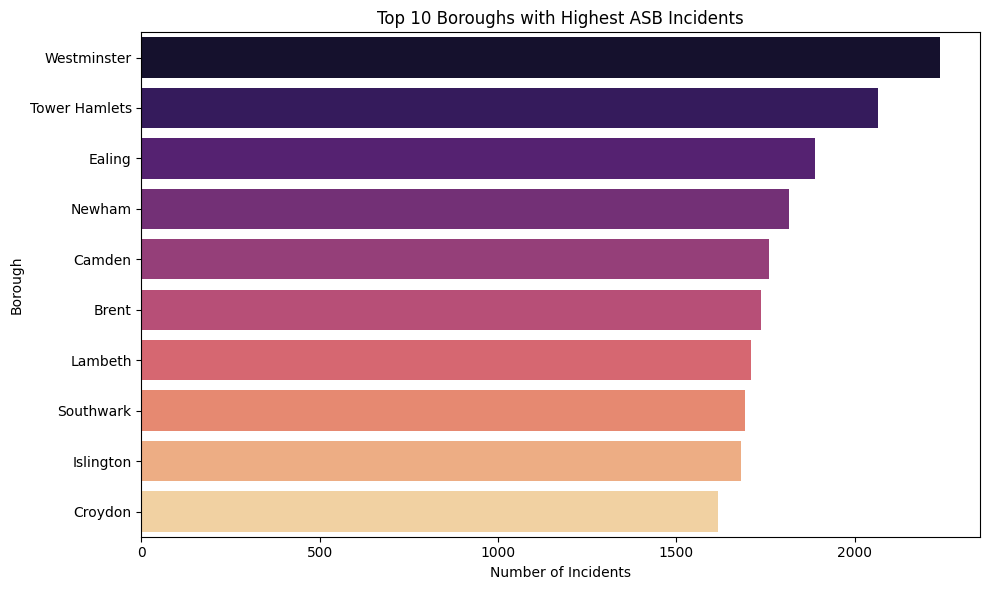

In [ ]:
# Top 10 boroughs
top_boroughs = df['Safer_Neighborhood_Team_Borough_Name'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_boroughs.values, y=top_boroughs.index, palette='magma')
plt.title('Top 10 Boroughs with Highest ASB Incidents')
plt.xlabel('Number of Incidents')
plt.ylabel('Borough')
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import shapiro

sample = df['Response_Time'].sample(5000, random_state=1)  # Only if dataset is large
stat, p = shapiro(sample)
print(f"Shapiro-Wilk test: stat = {stat}, p = {p}")


Shapiro-Wilk test: stat = 0.11371111285659286, p = 5.148794533320024e-93


### **Section 5 – Statistical Analysis**

**Chi-square: ASB type vs borough**

In [ ]:

# Create a cross-tab (contingency table)
contingency_table = pd.crosstab(df['Opening_Type_2'], df['Safer_Neighborhood_Team_Borough_Name'])

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square value = {chi2}")
print(f"p-value = {p}")


Chi-square value = 3788.02480082317
p-value = 7.439969074757712e-63


**Hour distribution test**

In [ ]:

# Count incidents per hour
hour_counts = df['Hour'].value_counts().sort_index()

# Expected = average if evenly distributed
expected = [hour_counts.mean()] * len(hour_counts)

# Chi-square goodness of fit test
chi2_hour, p_hour = chisquare(f_obs=hour_counts, f_exp=expected)

print(f"Chi-square = {chi2_hour}, p-value = {p_hour}")


Chi-square = 7556.197655265963, p-value = 0.0


In [ ]:
print(df['Hour'].value_counts().sort_index())
print(df['Hour'].nunique())


Hour
0     1694
1     1259
2     1040
3      740
4      623
5      470
6      508
7      783
8     1170
9     1355
10    1639
11    1735
12    1916
13    1967
14    1799
15    2355
16    2409
17    2649
18    2572
19    2601
20    2554
21    2498
22    2574
23    2374
Name: count, dtype: int64
24


### **Section 6 – Weekday vs Weekend**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])  # Replace 'Date' with date column name
# Create a new column "Day_Type"
df['Day_Type'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6


df['Day_Type'] = df['Day_Type'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
counts = df['Day_Type'].value_counts()
# Prepare observed and expected
observed = counts.values
expected = [observed.sum()/2, observed.sum()/2]

# Apply Chi-square
chi2_stat, p_val = chisquare(f_obs=observed, f_exp=expected)

print("Chi-square Statistic:", chi2_stat)
print("P-value:", p_val)
